In [ ]:
# TODO: Write an entry in the README for this notebook

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
def d(a, b):
    """
    Calculates the Euclidean distance between two vectors.
    
    :param a: A vector
    :param b: A vector
    :return: The Euclidean distance between `a` and `b`.        
    """
    
    return np.sqrt((a - b) @ (a - b))

In [5]:
iris = sns.load_dataset("iris").dropna()

In [6]:
def nearest_neighbors(X, y, x_n, K):
    """
    Finds the K nearest neighbors of a given point in a dataset.
    
    :param X: A numpy array of shape (n_samples, n_features) containing the feature vectors of the training data.
    :param y: A numpy array of shape (n_samples,) containing the corresponding labels for the training data.
    :param x_n: A numpy array of shape (n_features,) representing the query point.
    :param K: The number of nearest neighbors to return.
    
    :return: A list of tuples, where each tuple contains:
            - The distance to the query point.
            - The feature vector of the neighbor.
            - The label of the neighbor.
        The list is sorted in ascending order of distance.
    """
    distances = [(d(x, x_n), x, y) for x, y in zip(X, y)]
    distances.sort(key = lambda x : x[0])
    
    return distances[:K]

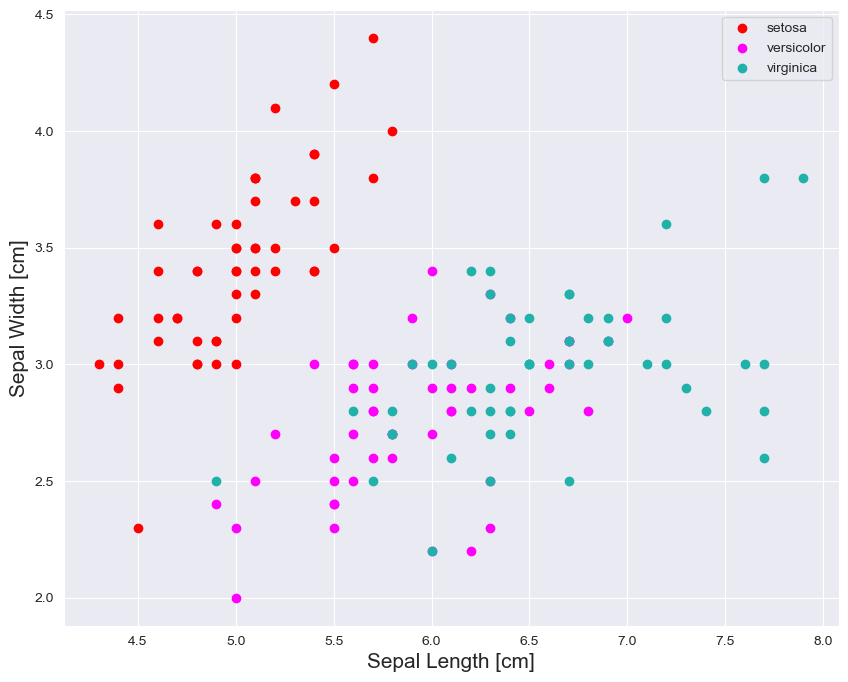

In [8]:
# Define flower species and corresponding colors
flowers = ["setosa", "versicolor", "virginica"]
colors = ["red", "magenta", "lightseagreen"]

# Create a figure and axes for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate through flowers and colors, plotting points for each species
for species, color in zip(flowers, colors):
    curr_df = iris[iris.species == species]
    ax.scatter(curr_df.sepal_length, curr_df.sepal_width, c=color, label=species)

ax.set_xlabel("Sepal Length [cm]", fontsize=15)
ax.set_ylabel("Sepal Width [cm]", fontsize=15)
ax.legend()

plt.show()

In [9]:
X = iris[["petal_length", "petal_width"]].to_numpy()  # Get features and convert to numpy arrays
y = iris["species"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)  # Split data into testing and training

In [10]:
def KNN(X, y, target, K=3, regression=False):
    """
    Implements the K-Nearest Neighbors (KNN) algorithm for classification or regression.
    
    For classification:
        - Finds the K nearest neighbors to the `target` point.
        - Returns the most frequent label among the K nearest neighbors.

    For regression:
        - Finds the K nearest neighbors to the `target` point.
        - Returns the average target value of the K nearest neighbors.
    
    :param X: A numpy array containing the feature vectors of the training data.
    :param y: A numpy array containing the labels or target values of the training data.
    :param target: A numpy array representing the feature vector of the point to classify or regress.
    :param K: The number of nearest neighbors to consider (default is 3).
    :param regression: A boolean flag indicating whether to perform regression (True) or classification (False).

    :return: predicted label or target value for the input `target` point.
    """
    neighbors = nearest_neighbors(X, y, target, K)
    if regression:
        return np.mean([x[2] for x in neighbors])
        # return sum(x[2] for x in neighbors) / K
    else: 
        labels = [n[2] for n in neighbors]
        return max(labels, key = labels.count)

In [11]:
KNN(X_train, y_train, X_test[20], 5)

'versicolor'

In [12]:
def classification_error(test_features, test_labels, training_features, training_labels, k):
    """
    Calculates the classification error rate of a K-Nearest Neighbors (KNN) classifier.

    :param test_features: A numpy array containing the feature vectors of the test data.
    :param test_labels: A numpy array containing the true labels of the test data.
    :param training_features: A numpy array containing the feature vectors of the training data.
    :param training_labels: A numpy array containing the true labels of the training data.
    :param k: The number of nearest neighbors to consider.

    :return: The classification error rate of the K-Nearest Neighbors (KNN) classifier, which is the proportion of misclassified test points.
    """
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN(training_features, training_labels, point, k)
    return error/len(test_features)

In [13]:
classification_error(X_test, y_test, X_train, y_train, 10)

0.04

In [14]:
possible_k = [k for k in range(3, 26, 2)]  # Test different values of K
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]  # Calculate the classification error each k

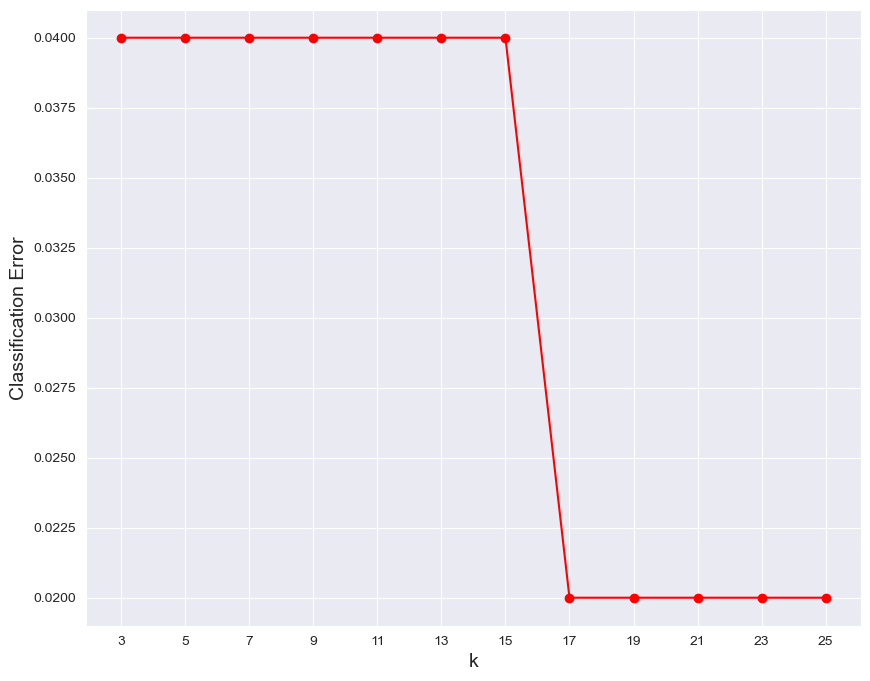

In [15]:
# Plot the different error values vs k values
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()